In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint as pprint
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

### Generate the Cities List by Using the `citipy` Library

In [17]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [18]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1


# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
  
    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:

        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | invercargill
Processing Record 2 of Set 1 | qusmuryn
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | pasuquin
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | tolanaro
Processing Record 10 of Set 1 | stanley
Processing Record 11 of Set 1 | alsfeld
Processing Record 12 of Set 1 | la sarre
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | hamilton
Processing Record 16 of Set 1 | high rock
Processing Record 17 of Set 1 | bayganin
Processing Record 18 of Set 1 | chandler
Processing Record 19 of Set 1 | de aar
Processing Record 20 of Set 1 | sierra grande
Processing Record 21 of Set 1 | ribeira grande
Processing Record 22 of Set 1 | itacoatiara
Processing Reco

In [19]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [20]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,invercargill,-46.4000,168.3500,10.95,87,57,0.99,NZ,1686627893
1,qusmuryn,52.4503,64.6311,10.53,72,100,6.78,KZ,1686628084
2,albany,42.6001,-73.9662,19.94,81,100,0.89,US,1686628084
3,bredasdorp,-34.5322,20.0403,14.19,81,84,11.43,ZA,1686627889
4,pasuquin,18.3328,120.6177,29.97,79,75,9.26,PH,1686628085


In [21]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [22]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,10.95,87,57,0.99,NZ,1686627893
1,qusmuryn,52.4503,64.6311,10.53,72,100,6.78,KZ,1686628084
2,albany,42.6001,-73.9662,19.94,81,100,0.89,US,1686628084
3,bredasdorp,-34.5322,20.0403,14.19,81,84,11.43,ZA,1686627889
4,pasuquin,18.3328,120.6177,29.97,79,75,9.26,PH,1686628085


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

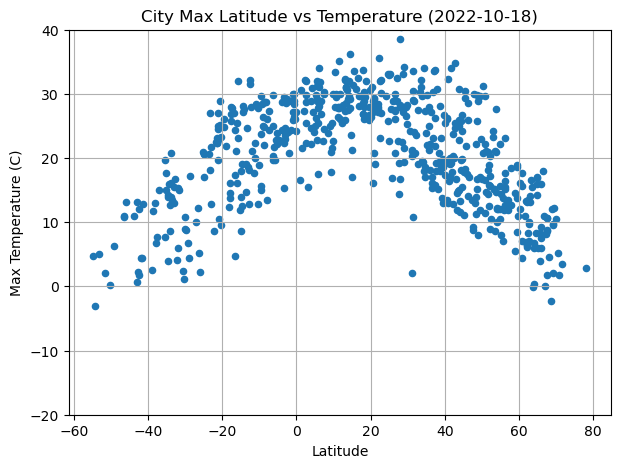

In [23]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter', x='Lat', y='Max Temp', grid=True, figsize=(7,5), title="City Max Latitude vs Temperature (2022-10-18)")

# Incorporate the other graph properties
plt.ylim(-20,40)
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

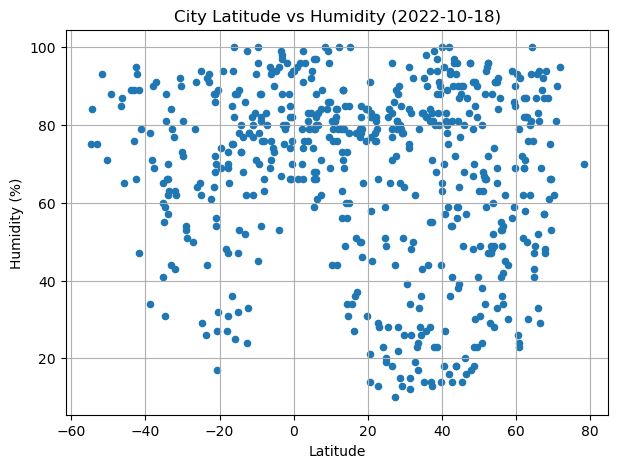

In [24]:
# Build scatter plot for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', grid=True, figsize=(7,5), title="City Latitude vs Humidity (2022-10-18)")

# Incorporate the other graph properties
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

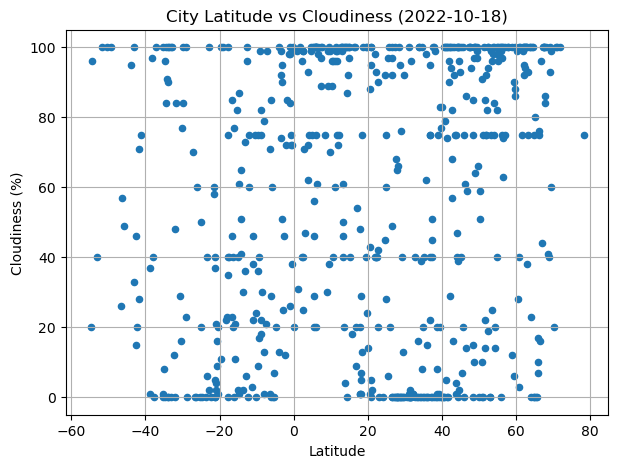

In [25]:
# Build scatter plot for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', grid=True, figsize=(7,5), title="City Latitude vs Cloudiness (2022-10-18)", )

# Incorporate the other graph properties
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

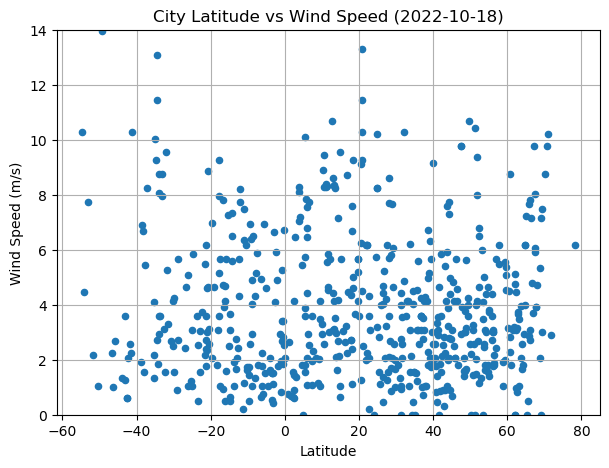

In [26]:
# Build scatter plot for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', grid=True, figsize=(7,5), title="City Latitude vs Wind Speed (2022-10-18)", )

# Incorporate the other graph properties
plt.ylim(0,14)
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,qusmuryn,52.4503,64.6311,10.53,72,100,6.78,KZ,1686628084
2,albany,42.6001,-73.9662,19.94,81,100,0.89,US,1686628084
4,pasuquin,18.3328,120.6177,29.97,79,75,9.26,PH,1686628085
9,stanley,54.8680,-1.6985,10.50,91,100,1.54,GB,1686627762
10,alsfeld,50.7500,9.2667,11.40,80,0,1.46,DE,1686628085


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,10.95,87,57,0.99,NZ,1686627893
3,bredasdorp,-34.5322,20.0403,14.19,81,84,11.43,ZA,1686627889
5,port-aux-francais,-49.3500,70.2167,6.24,88,100,13.96,TF,1686628085
6,blackmans bay,-43.0167,147.3167,13.18,76,100,3.58,AU,1686627887
7,avarua,-21.2078,-159.7750,25.03,88,40,6.17,CK,1686627979


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7263187237766269


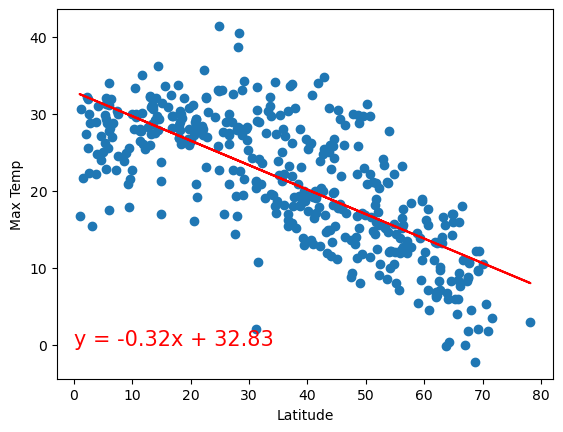

In [29]:
# Linear regression on Northern Hemisphere
 # Plot the different factors in a scatter plot
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.7430658894655283


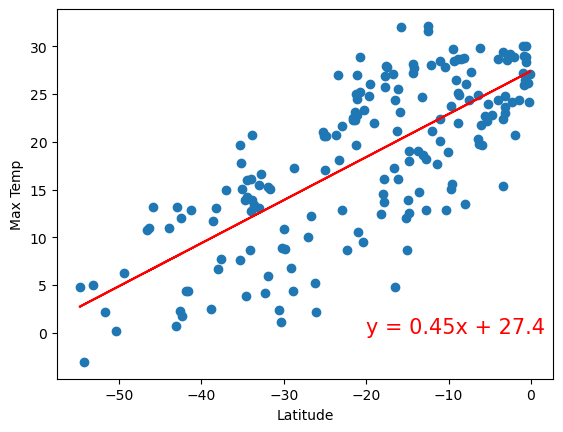

In [30]:
# Linear regression on Southern Hemisphere
 # Plot the different factors in a scatter plot
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** For the Northern Hemisphere relationship between Max Temp and Latitude, this graph is showing a negative correlation, as indicated by the negative r-value and the regression line. What this means is that as Latitude increases, the Max Temp decreases. The opposite occurs for the Southern Hemisphere plot, showing a positive correlation that as Latitude increases, so does the Max Temperature. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.1062520709932232


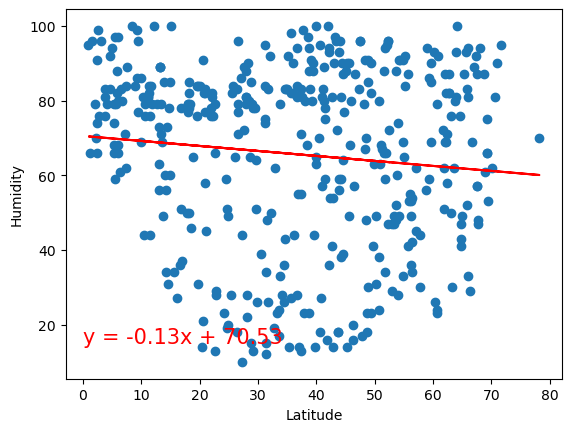

In [31]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.1259739263551108


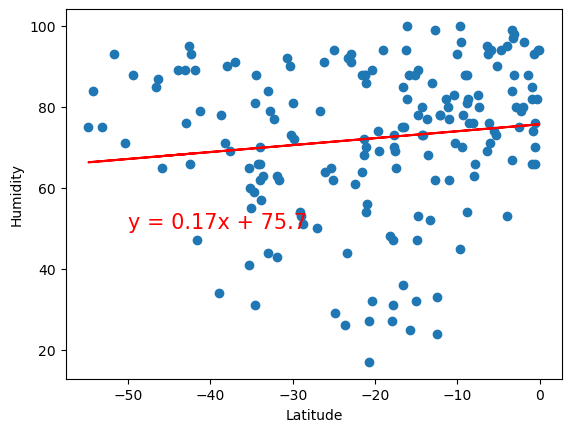

In [32]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** For the Northern Hemisphere relationship between Humidity and Latitude, this graph is showing a slight negative correlation, as indicated by the negative r-value and the regression line. What this means is that as Latitude increases, the Humidity trends down. The opposite occurs for the Southern Hemisphere plot, showing a slight positive correlation that as Latitude increases, so does the Max Humidity. For both plots, the smaller r-values mean there is not a strong correlation between both variables. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.04916938400694805


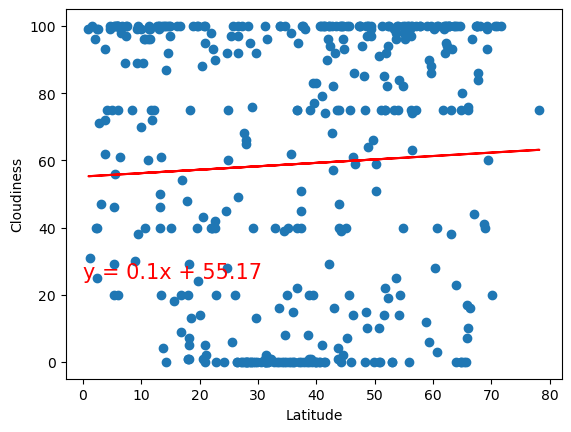

In [33]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.01422982951828893


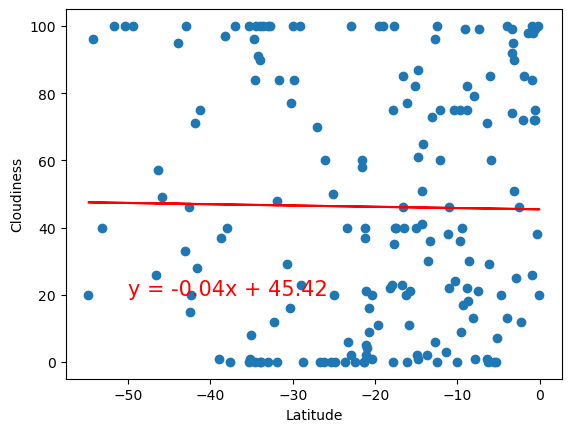

In [34]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** For both the Northern and Southern Hemisphere plots, the small r-value and regression line show that there is not a strong correlation between Cloudiness and Latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.07053942403236847


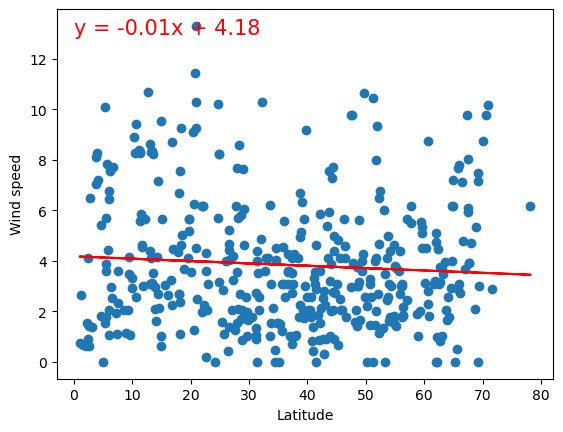

In [35]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,13),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind speed')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.07053942403236847


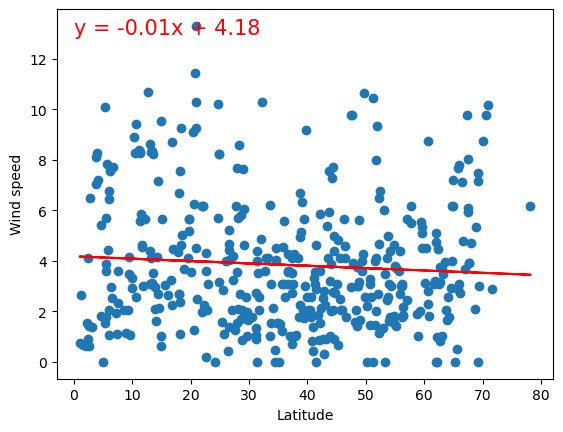

In [36]:
# Southern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,13),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind speed')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** For both the Northern and Southern Hemisphere plots, the small r-value and regression line show that there is not a strong correlation between Wind Speed and Latitude. There is not a strong correlation between the rate of change for wind speed and latitude.